In [73]:
from sklearn.datasets import make_moons, make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [74]:
m = 2
c = 2
n = 1000

In [75]:
# choisir c centres aléatoirement
def init_W(X, c, d):
    W = np.zeros(shape=(c, d), dtype=float)
    min_axes = np.min(X.T, axis=1)
    max_axes = np.max(X.T, axis=1)

    for i in range(c):
        for j in range(d):
            W[i][j] = np.random.uniform(low=min_axes[j], high=max_axes[j])
    return W

def update_D(D, X, W):
    for i in range(len(X)):
        for r in range(len(W)):
            D[i, r] = np.linalg.norm(X[i]-W[r])
    return D

def update_U(D, U, m):
    for i in range(len(U)):
        for r in range(len(U[0])):
            somme = 0.
            for s in range(len(U[0])):
                somme += (D[i, r]/D[i, s])**(2/(m-1))
            U[i, r] = 1/somme
    return U

def update_W(W, U, X, m):
    W_new = np.zeros_like(W)
    for r in range(len(W)):
        W_new[r] = ((U[:, r]**m)[:,None]*X).sum(0)/(U[:, r]**m).sum()
    return W_new

def is_converged(W_old, W_new):
    if np.linalg.norm(W_old-W_new, axis=-1).sum() < 1e-7:
        return True
    return False

In [76]:
import copy

def c_means(c, X, m=2):
    n = len(X)
    d = len(X[0])
    # distance
    D = np.zeros(shape=(n, c))
    # degree d'appartenance
    U = np.zeros(shape=(n, c))

    W = init_W(X, c, d)
    converged = False
    while not converged:
        D = update_D(D, X, W)
        U = update_U(D, U, m)
        W_new = update_W(W, U, X, m)
        
        if is_converged(W_old=W, W_new=W_new):
            converged = True
        W = W_new
    return W, D, U

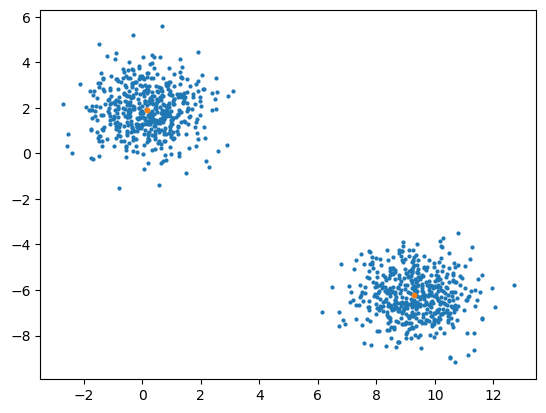

In [78]:
n = 1000
X, Y = make_blobs(n, centers=2, cluster_std=1.)
W, D, U = c_means(c = 2, X=X, m = 2)
plt.scatter(X[...,0], X[..., 1], s=4)
plt.scatter(W[:, 0], W[:, 1], s =10)
plt.show()

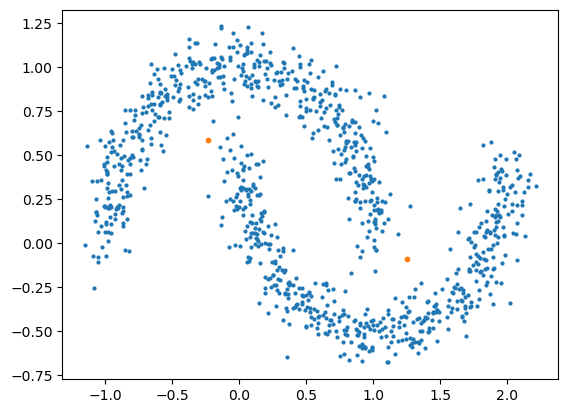

In [77]:
n = 1000
X, Y = make_moons(n, noise=0.1)
W, D, U = c_means(c = 2, X=X, m = 2)
plt.scatter(X[...,0], X[..., 1], s=4)
plt.scatter(W[:, 0], W[:, 1], s =10)
plt.show()